In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn import over_sampling
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt  
from matplotlib.pyplot import figure

In [3]:
df=pd.read_csv("Bank_cleansed.csv")
df

,age_group,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,campaign_group,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,50-59,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,50-59,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,30-39,services,married,high.school,no,yes,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,30-39,admin.,married,basic,no,no,no,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,50-59,services,married,high.school,no,no,yes,telephone,may,mon,...,1,1-10,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,70-79,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,40-49,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,50-59,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,40-49,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,1-10,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


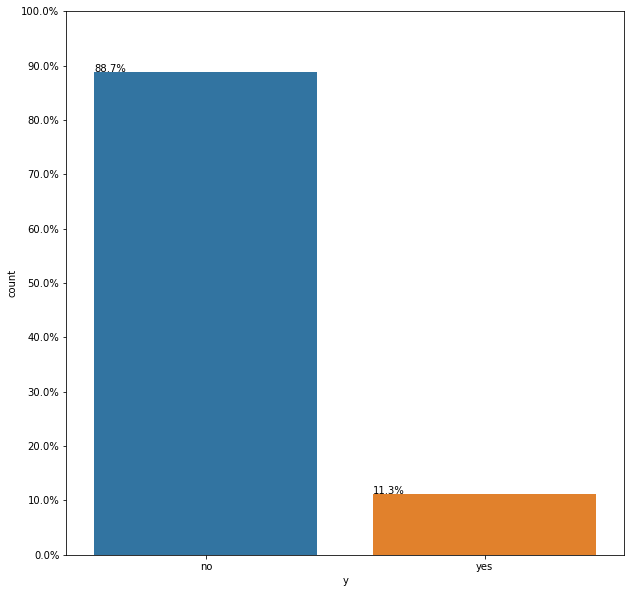

In [5]:
figure(figsize=(10,10))
total=len(df['y'])
plot=sns.countplot(x=df['y'],data=df)
for p in plot.patches:
    plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
plot.yaxis.set_ticks(np.linspace(0, total, 11))
plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
plt.show()

This plot shows th imbalance of the data

In [6]:
def countplot_columns(columns):
    figure(figsize=(15,10))
    plot=sns.countplot(x=columns,data=df)
    total=len(df['y'])
    
    for p in plot.patches:
        
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()),size=15, xytext=(0,8),textcoords='offset points')
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

def countplot_target_varaible(columns,classes):
    figure(figsize=(15,10))
    total=len(df[classes])
    plot=sns.countplot(x=columns,data=df,hue=classes)
    for p in plot.patches:
        plot.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x(), p.get_height()))
    plot.yaxis.set_ticks(np.linspace(0, total, 11))
    plot.set_yticklabels(map('{:.1f}%'.format, 100*plot.yaxis.get_majorticklocs()/total))
    plt.show()

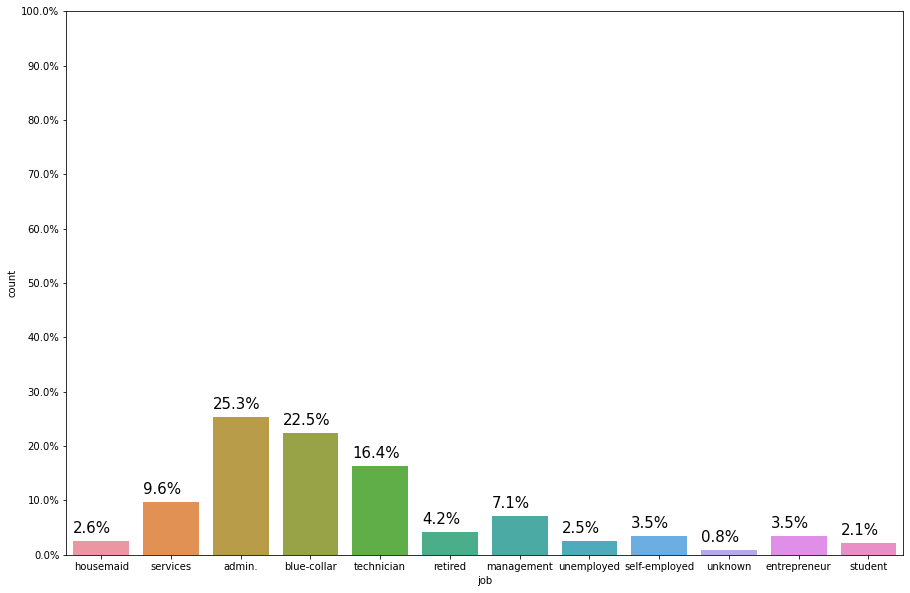

In [7]:
countplot_columns('job')

Admin, blue-colar and technicians were the most people contacted.

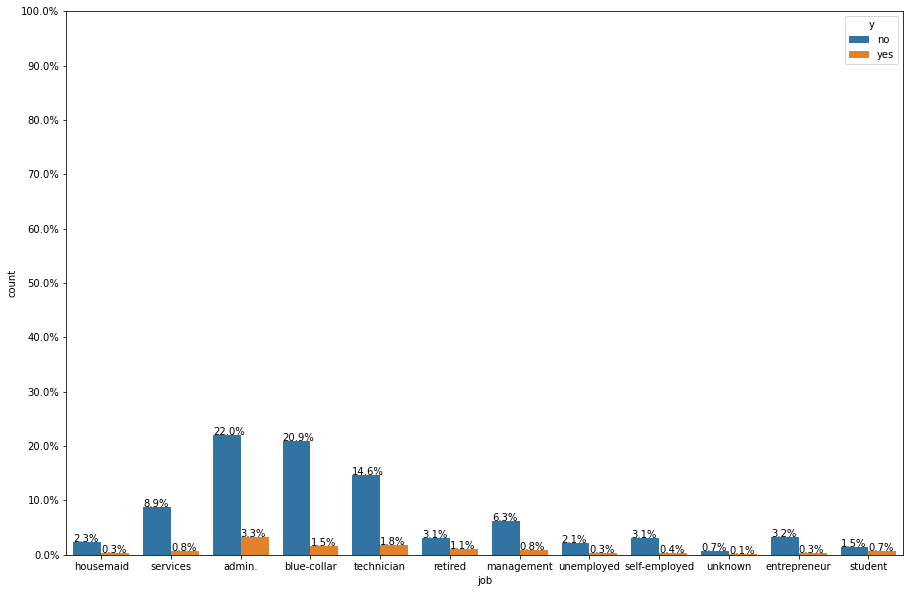

In [8]:
countplot_target_varaible('job','y')

Percantage of accepting the offer for each professional 

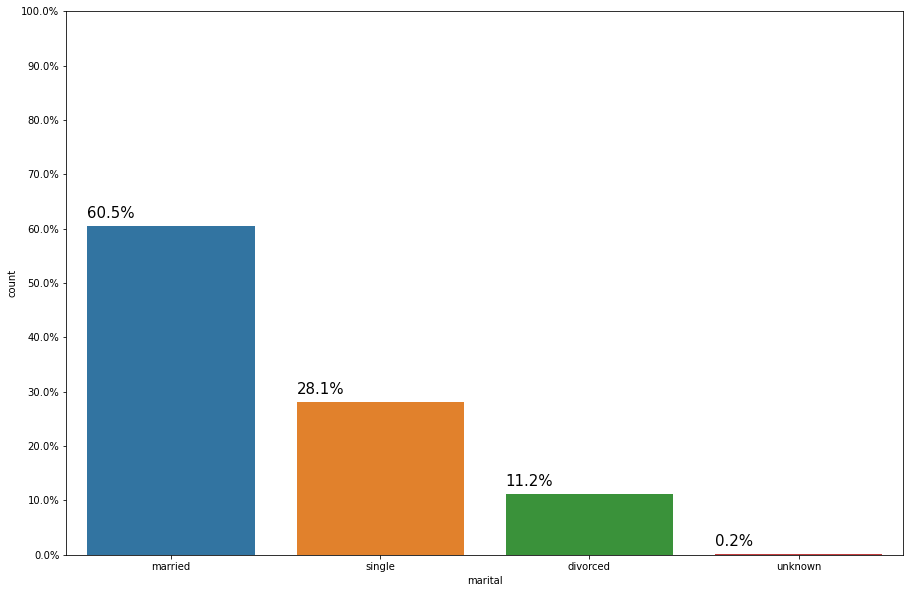

In [9]:
countplot_columns('marital')

Most of the clients were married

In [10]:
def plotting_kd(data,columns,hue=None):
    if hue==None:    
       plot=sns.FacetGrid(data,size=10).map(sns.distplot,columns)
    else:
        plot=sns.FacetGrid(data,hue=hue,size=10).map(sns.distplot,columns)
        plt.pyplot.legend()

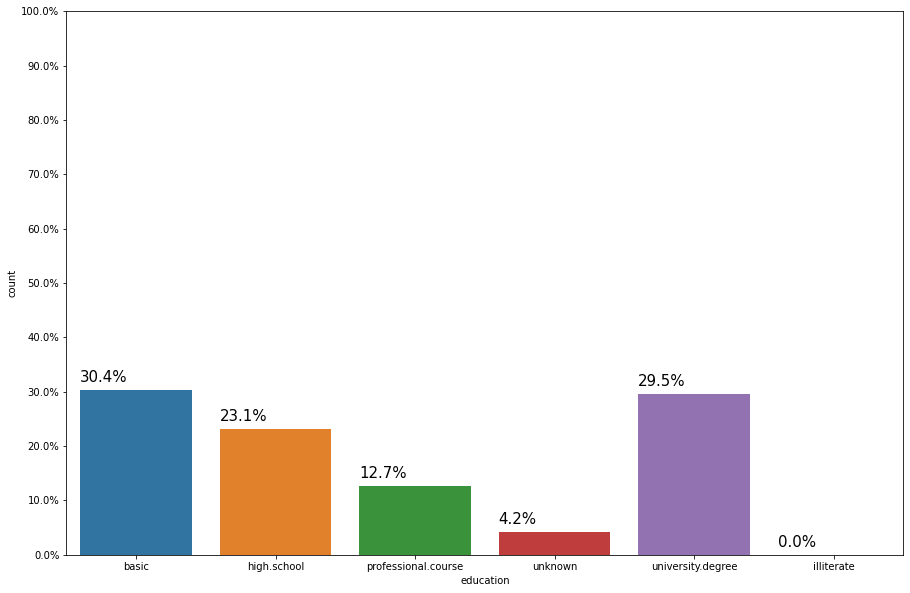

In [11]:
countplot_columns("education")

University graduates and basic education were the most contacted people

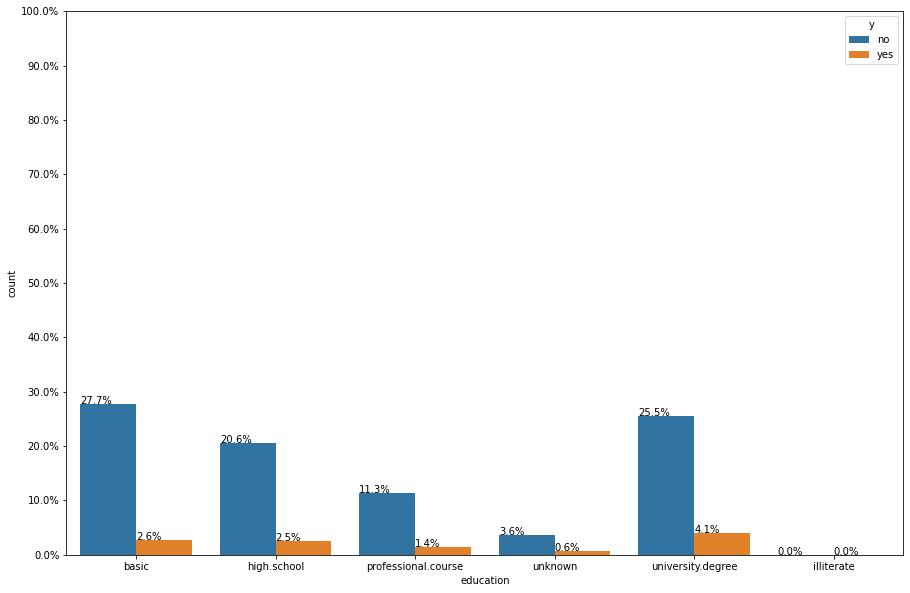

In [12]:
countplot_target_varaible("education","y")

University and basic graduates were the most people accepting the offer

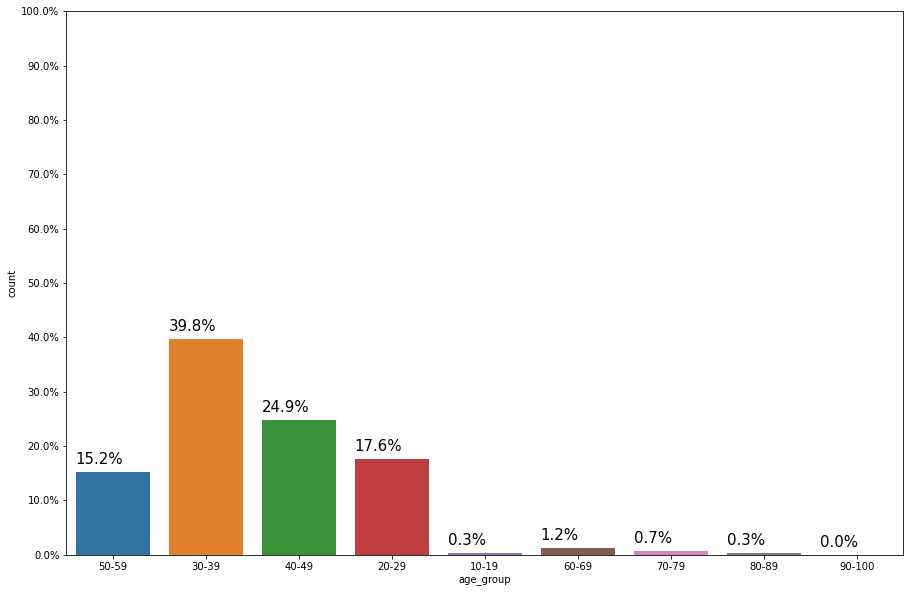

In [13]:
countplot_columns("age_group")

30-39 age group were the most targeted category

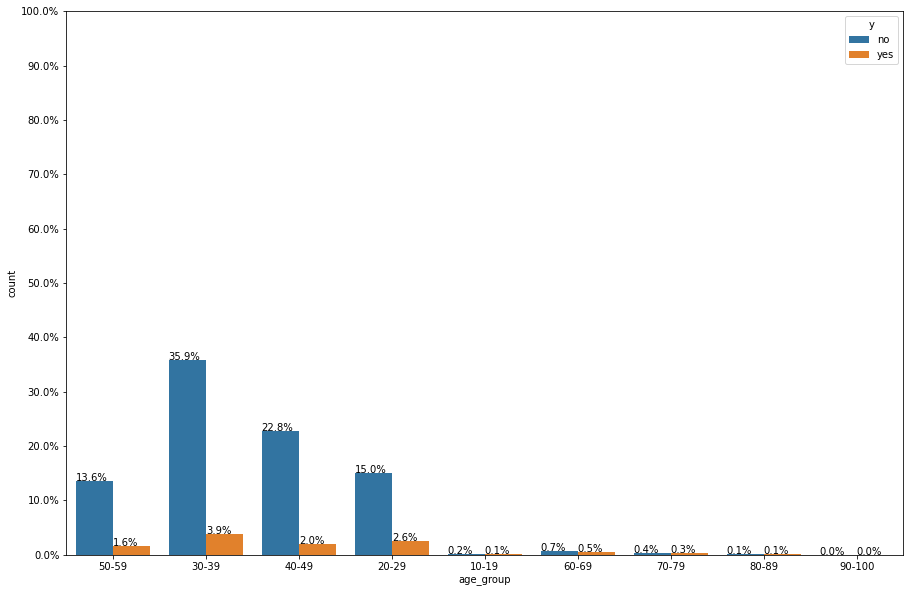

In [14]:
countplot_target_varaible("age_group","y")

Although 40-49 group were contacted more, yet 20-29 group subscribed more

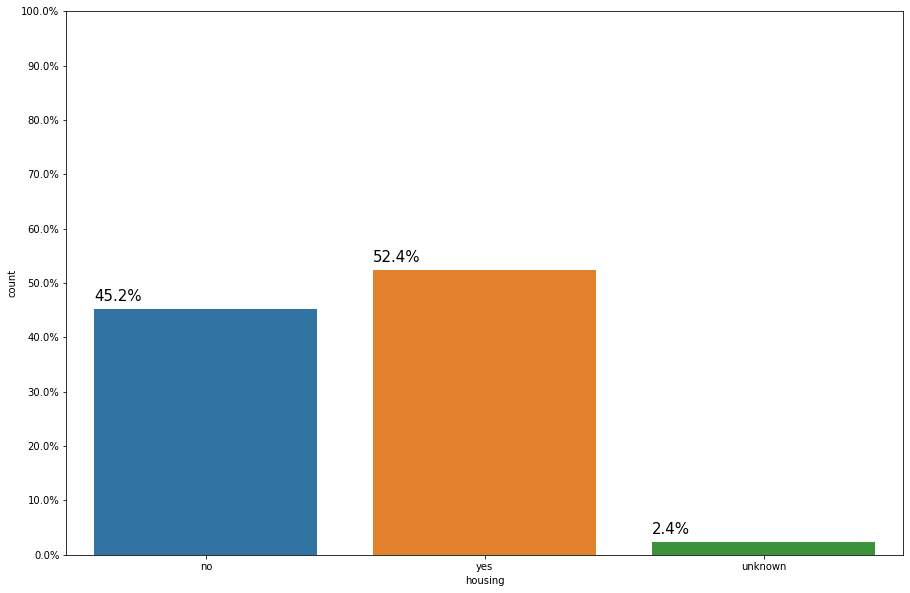

In [15]:
countplot_columns("housing")

People with houses were contacted more than others

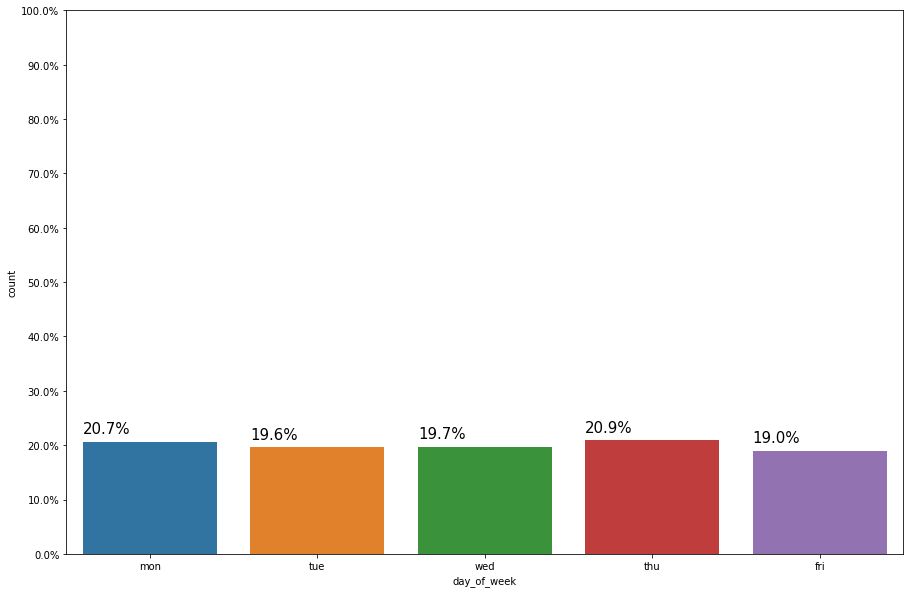

In [16]:
countplot_columns("day_of_week")

No contacts were made on weekends and contacts were mostly equal through the working days

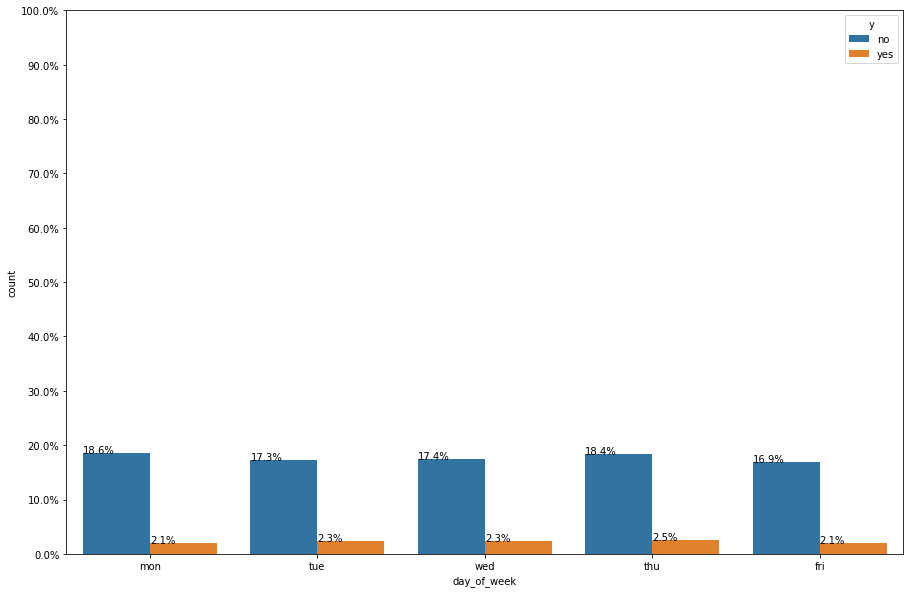

In [17]:
countplot_target_varaible("day_of_week","y")

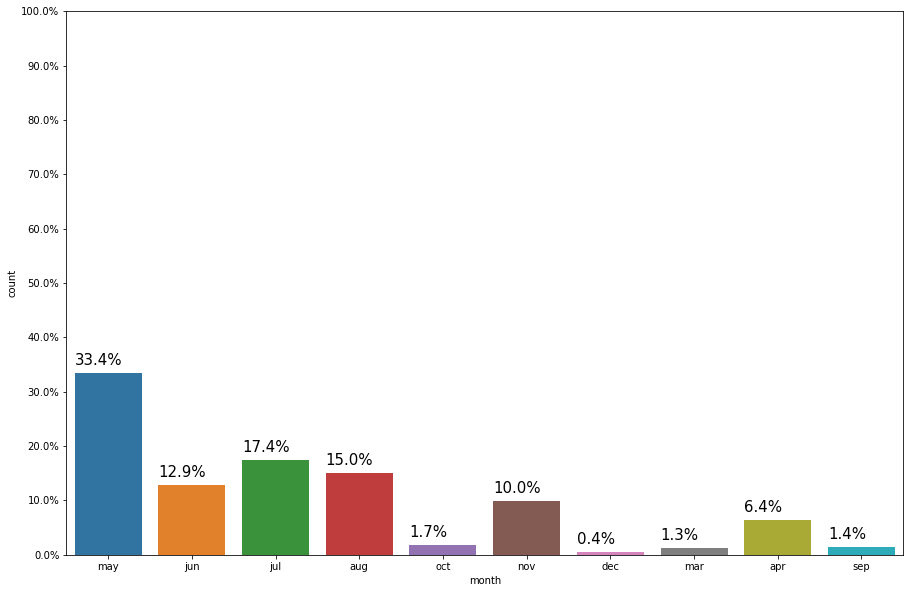

In [18]:
countplot_columns("month")

Summer was more crowded than rest of the year

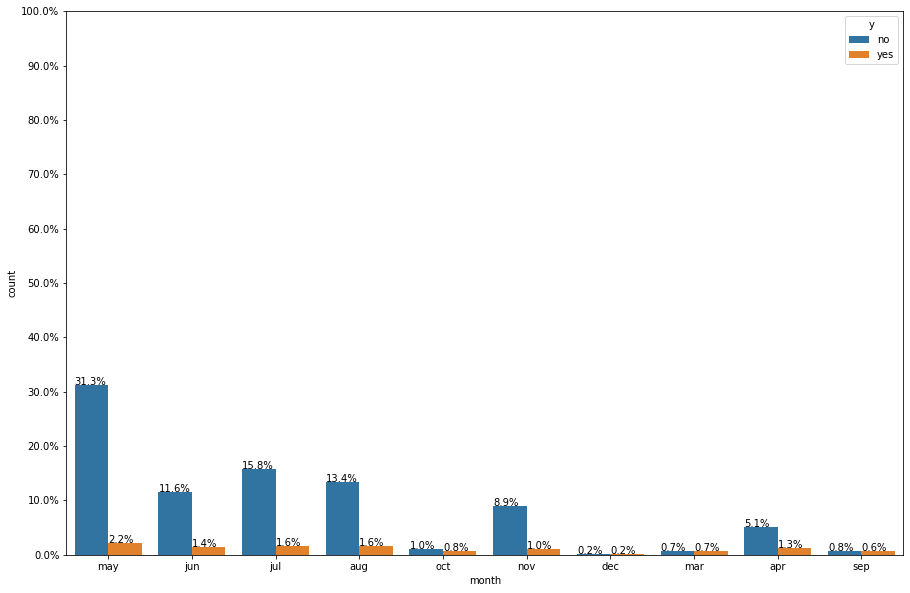

In [19]:
countplot_target_varaible('month','y')

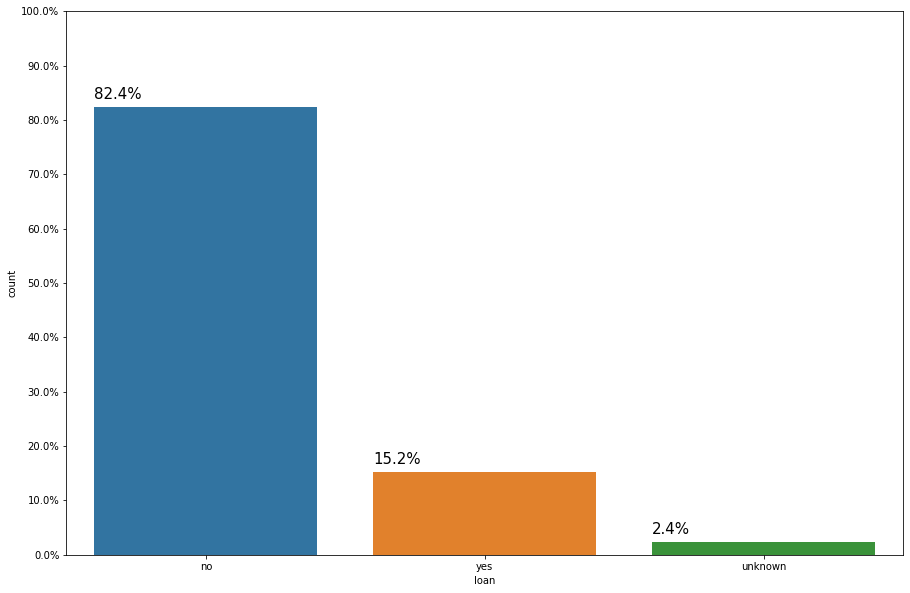

In [20]:
countplot_columns('loan')

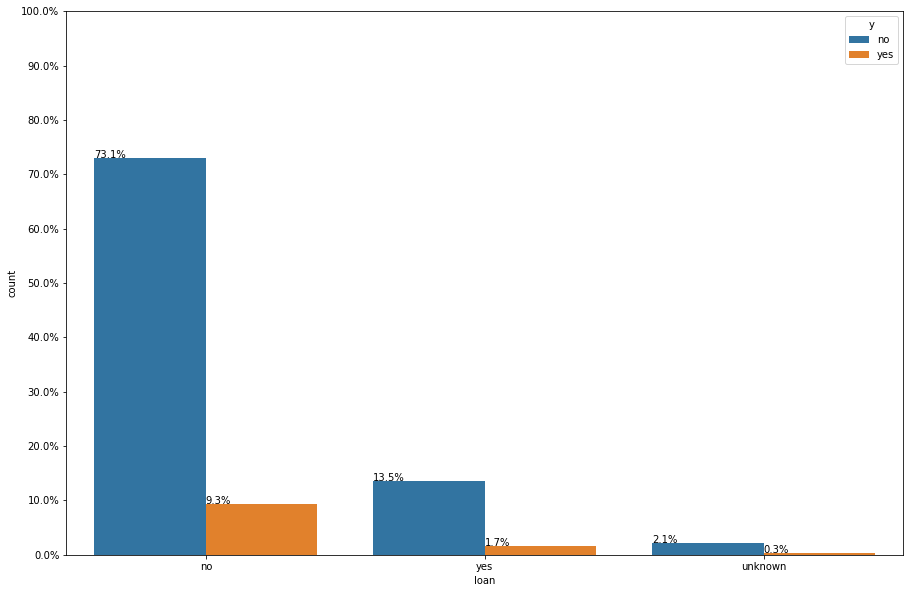

In [21]:
countplot_target_varaible('loan','y')

People without loans were contacted more since they do not have bank commitments

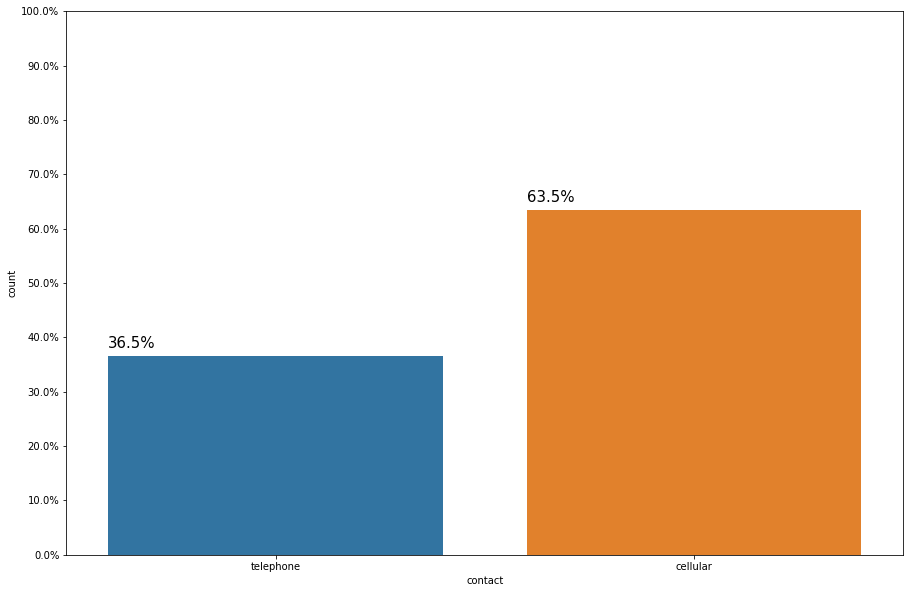

In [22]:
countplot_columns("contact")

Contact was through cellular more than telephone

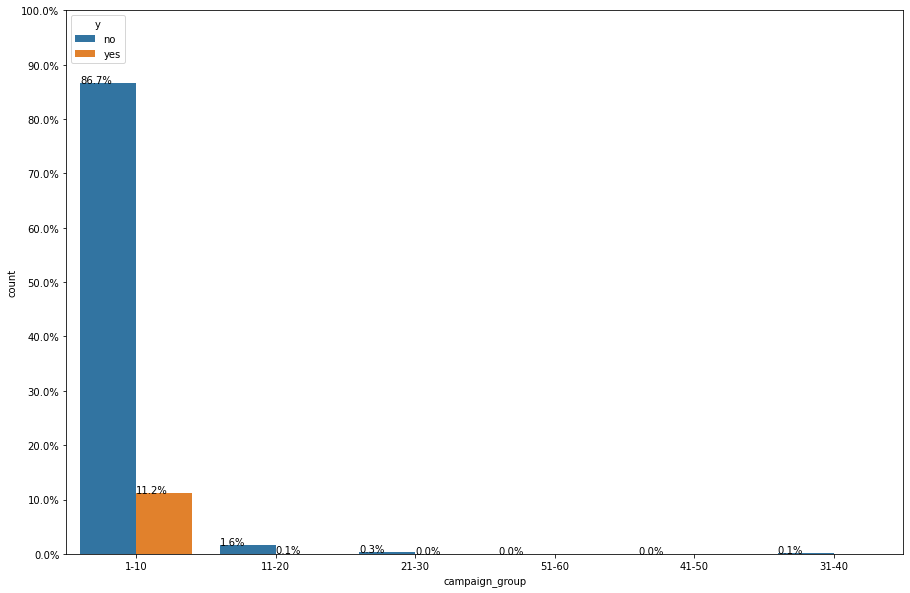

In [23]:
countplot_target_varaible("campaign_group","y")

Most customers were contacted between 1 and 10 times and 11.2% subscribed during the campaigns

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


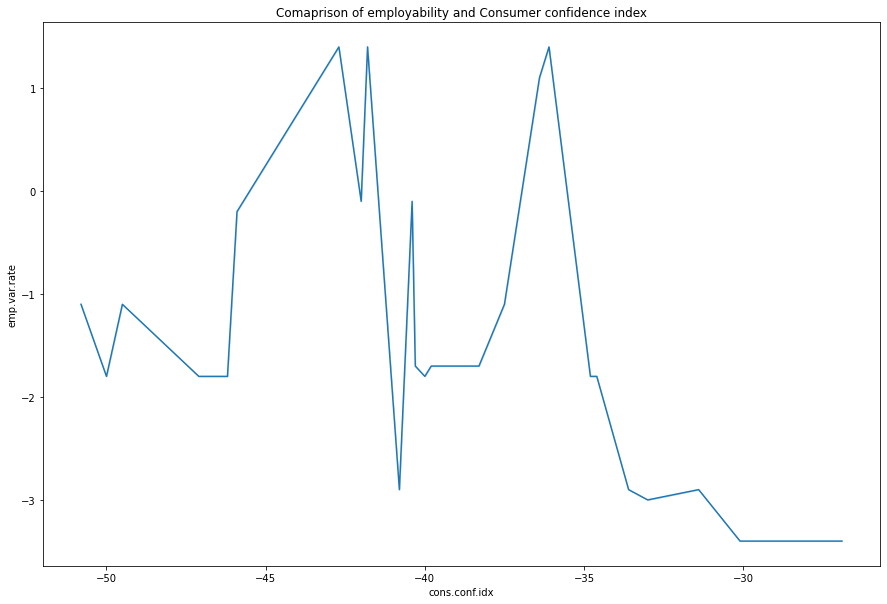

In [24]:
figure(figsize=(15,10))
plt.title('Comaprison of employability and Consumer confidence index')
sns.lineplot('cons.conf.idx','emp.var.rate', data =df,palette='inferno')

There is an immediate increase and decrease of how customers are likely to spend, that is particularly for the term deposit,those who do not have a stable source of income are likely not to take the offer unlike those who have a stbale income.

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


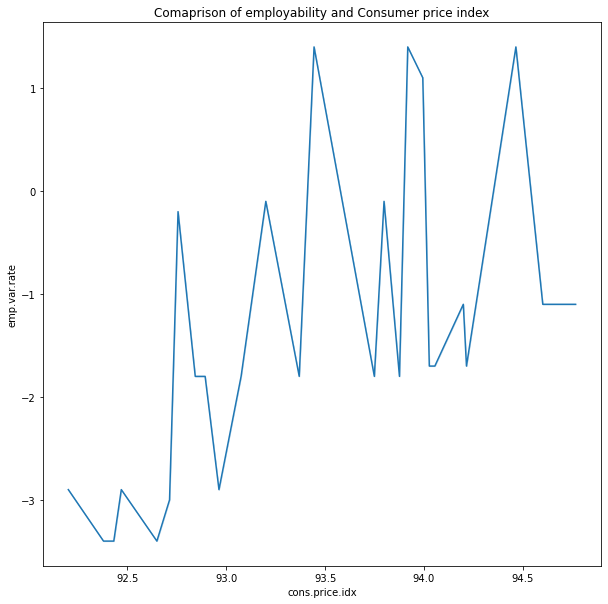

In [25]:
fig=figure(figsize=(10,10))
plt.title('Comaprison of employability and Consumer price index')
sns.lineplot('cons.price.idx','emp.var.rate', data =df)

An index of 110 means that there's been a 10% rise in the price of the market basket and 90% indicates a 10% decrease in the price of the market basket.There seems to be a positive correlation between the two variables

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


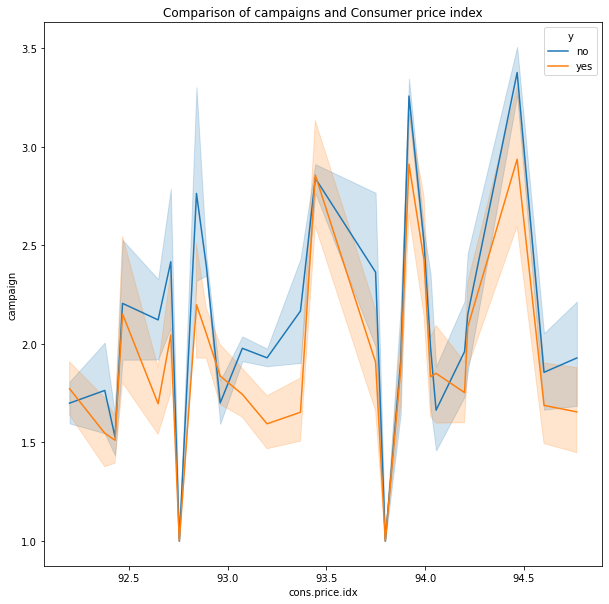

In [26]:
fig=plt.figure(figsize=(10,10))
plt.title('Comparison of campaigns and Consumer price index')
sns.lineplot('cons.price.idx','campaign', data =df, hue='y')

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


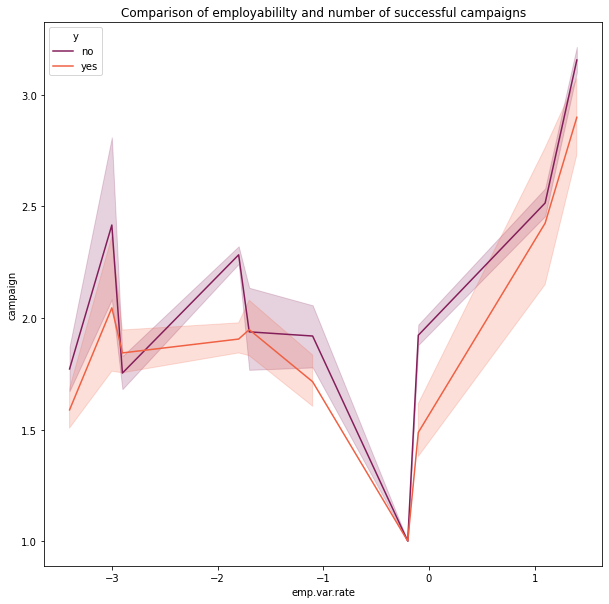

In [27]:
fig=plt.figure(figsize=(10,10))
plt.title('Comparison of employabililty and number of successful campaigns')
sns.lineplot('emp.var.rate','campaign', data =df, hue='y',palette='rocket')

We can clearly say that when the employability rate was at a zero(not many people having jobs) the number of successful campaigns were low. However when the rate changes to 1 which is a positive rate the customers subscribing to the term deposit are high.

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


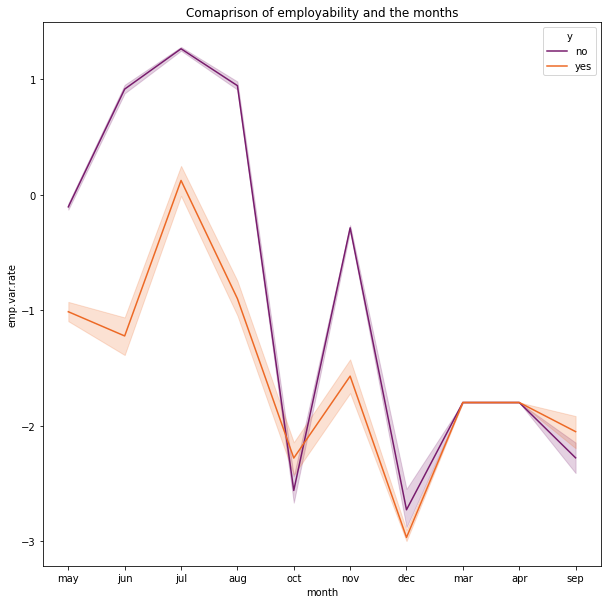

In [28]:
fig=plt.figure(figsize=(10,10))
plt.title('Comaprison of employability and the months')
sns.lineplot('month','emp.var.rate', data =df, hue='y',palette='inferno')

There was a stagnancy in March and April of those who took the term deposit. December had the lowest rate of employability and majority did not take the term deposit. However betwwen May and July the numbers were quite high with July being the highest peak for the people who took the term deposit but it can still be noted that although the three months were good for the customers majority did not subscribe for a term deposit.

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


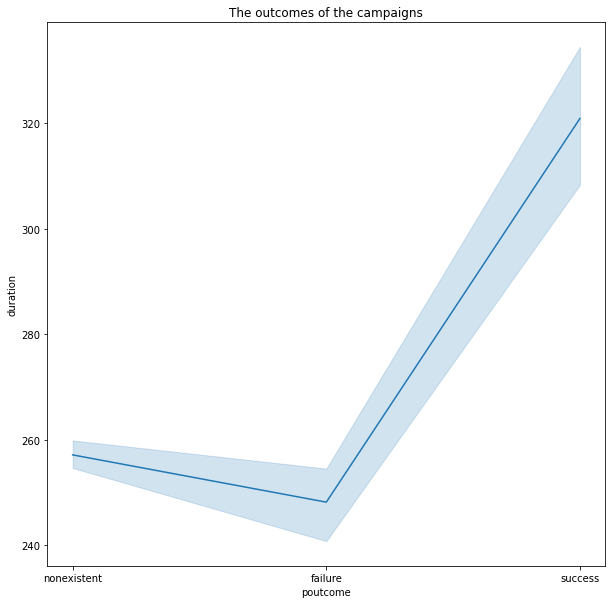

In [29]:
fig=plt.figure(figsize=(10,10))
plt.title('The outcomes of the campaigns')
sns.lineplot('poutcome','duration', data =df)

The campaigns that were successful were the ones that had a long call duration

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


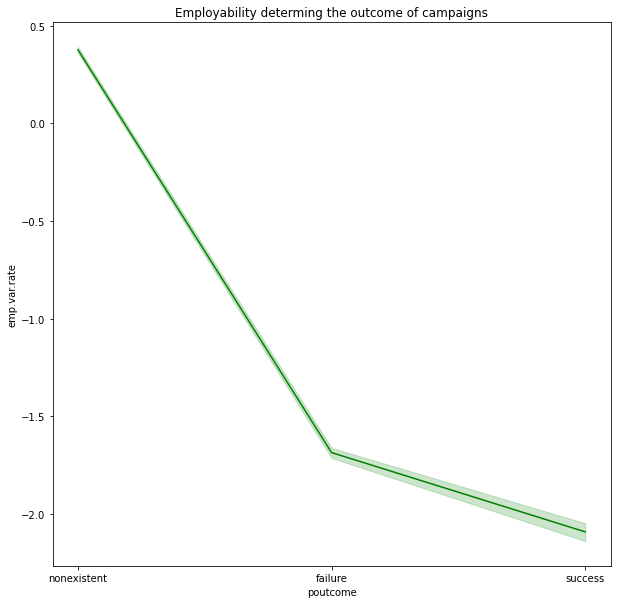

In [30]:
fig=plt.figure(figsize=(10,10))
plt.title('Employability determing the outcome of campaigns')
sns.lineplot('poutcome','emp.var.rate', data =df,color='green')

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


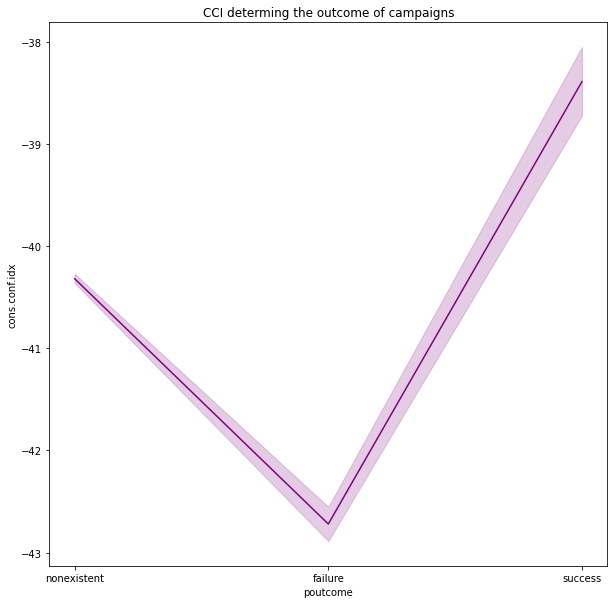

In [31]:
fig=plt.figure(figsize=(10,10))
plt.title('CCI determing the outcome of campaigns')
sns.lineplot('poutcome','cons.conf.idx', data =df,color='purple')

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


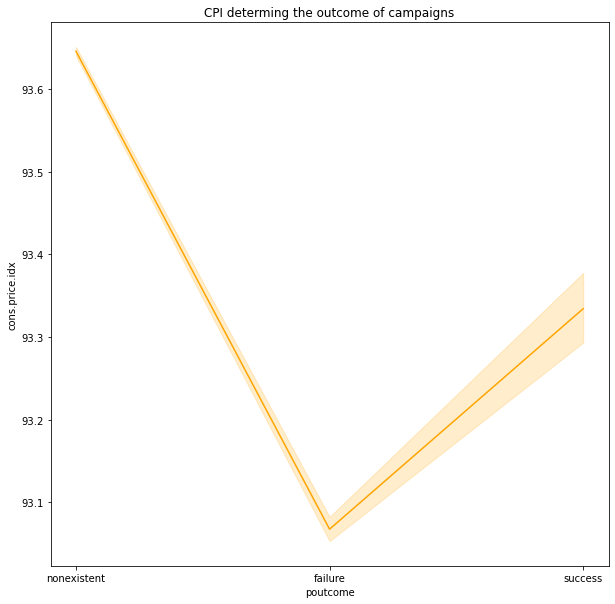

In [32]:
fig=plt.figure(figsize=(10,10))
plt.title('CPI determing the outcome of campaigns')
sns.lineplot('poutcome','cons.price.idx', data =df,color='orange')

C:\Users\DELL\anaconda3\envs\torchTens\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


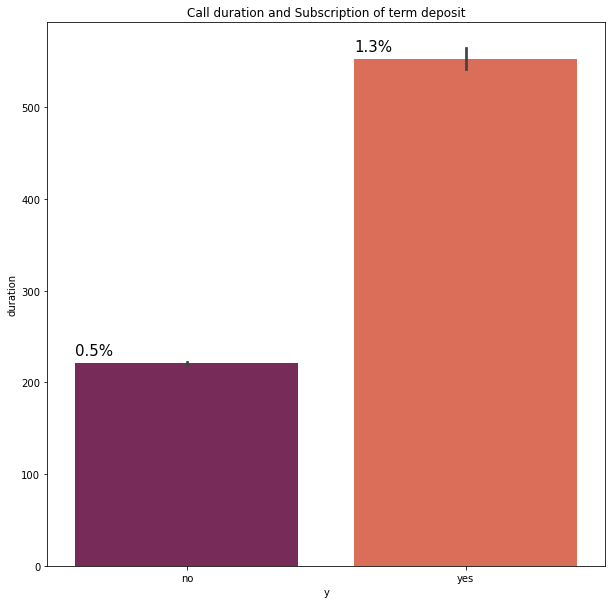

In [33]:
yes=len(df['y'])
fig=plt.figure(figsize=(10,10))
plot=sns.barplot('y','duration', data =df,palette='rocket')
for y in plot.patches:
  plt.title('Call duration and Subscription of term deposit')
  plot.annotate('{:.1f}%'.format(100*y.get_height()/yes),(y.get_x(),y.get_height()),size=15, xytext=(0,8),textcoords='offset points')

A long call duration has been a factor to influence those who had subscribed for a term deposit , this is accounted by 1.3%

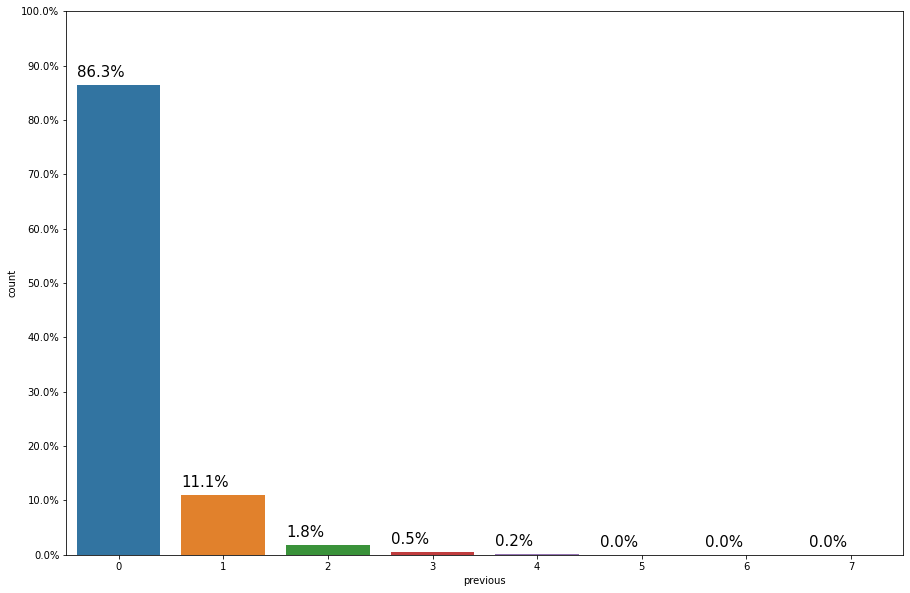

In [36]:
countplot_columns('previous')

Many customers who had never been contacted actually are the highest.

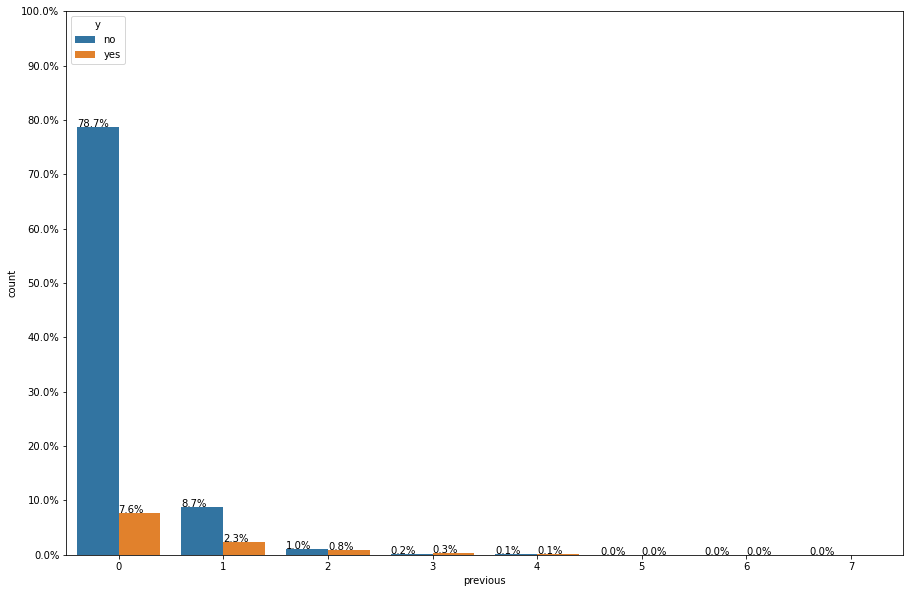

In [37]:
countplot_target_varaible("previous","y")

New customers were mostly targeted and had the highest rate of accepting the term deposit